In [104]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plot

In [118]:
#keras 패키지의 기본 MNIST 데이터 셋을 가지고옴 
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_test 형식은 [샘플수 , X픽셀수 ,y픽셀수]
print(X_train.shape)

(60000, 28, 28)


In [119]:
# 28 * 28 이미지 총 784 픽셀 
num_pixels = X_train.shape[1] * X_train.shape[2]

#데이터수 * 총 픽셀수의 형태로 변형 
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [121]:
# 8비트 픽셀 0~255 값을 0~1 사이 값으로 변경
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

print(X_test_cnv[0])

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [108]:
# 원핫 인코딩을 사용 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [109]:
# 레이저 제작 함수 
def make_model():
    # 레이어 제작
    model = Sequential()
    # output 개수 , input 개수
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # 최종적으로 나올 클래스 갯수
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # 학습 프로세스 설정
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [110]:
# 모델빌드
model = baseline_model()

# 데이터 학습 
model.fit(X_train_cnv, 
          y_train,
          validation_data=(X_test_cnv, y_test),
          epochs=10, batch_size=200,
          verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2799 - acc: 0.9207 - val_loss: 0.1405 - val_acc: 0.9589
Epoch 2/10
 - 8s - loss: 0.1112 - acc: 0.9674 - val_loss: 0.0940 - val_acc: 0.9723
Epoch 3/10
 - 8s - loss: 0.0720 - acc: 0.9796 - val_loss: 0.0836 - val_acc: 0.9745
Epoch 4/10
 - 8s - loss: 0.0496 - acc: 0.9855 - val_loss: 0.0714 - val_acc: 0.9770
Epoch 5/10
 - 8s - loss: 0.0362 - acc: 0.9898 - val_loss: 0.0606 - val_acc: 0.9813
Epoch 6/10
 - 8s - loss: 0.0267 - acc: 0.9929 - val_loss: 0.0608 - val_acc: 0.9802
Epoch 7/10
 - 8s - loss: 0.0198 - acc: 0.9949 - val_loss: 0.0578 - val_acc: 0.9815
Epoch 8/10
 - 8s - loss: 0.0147 - acc: 0.9967 - val_loss: 0.0571 - val_acc: 0.9817
Epoch 9/10
 - 8s - loss: 0.0106 - acc: 0.9977 - val_loss: 0.0585 - val_acc: 0.9823
Epoch 10/10
 - 8s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0614 - val_acc: 0.9806
Baseline Error: 1.94%


In [116]:
# 정확도 측정
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.95%


#### Now let's try to load a digit image and see how it works

In [111]:
from PIL import Image, ImageFilter
import PIL.ImageOps 
from numpy import array

class ScaleUtils():
    def __init__(self, p, h=28, w=28):
        self.im = Image.open(p)
        self.size = (h,w)
        
    def toGrey(self):
        self.im = self.im.convert("L")
        return self
    def resize(self):
        self.im = self.im.resize(self.size)
        return self
    def invert(self):
        self.im = PIL.ImageOps.invert(self.im)
        return self
    def getArray(self):
        return array(self.im)
    def getImage(self):
        return self.im
    
    
ScaleUtils("/Volumes/EXSD/mnist_5.png").toGrey().resize().invert().getImage().save("output.jpg", "JPEG")

### Predict using one from training set

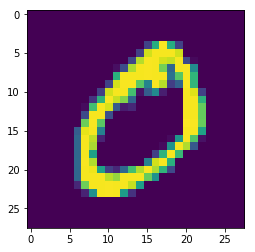

[0]


In [112]:
plt.imshow(X_train[1])
plt.show()

input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

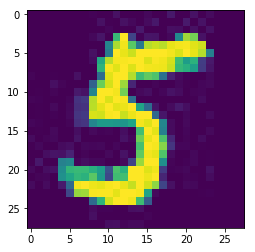

predict is :  [5]


In [117]:
from scipy.misc import imread
import matplotlib.pyplot as plt

im = imread("output.jpg")
plt.imshow(im)
plt.show()

input = im

X = input.reshape(1,num_pixels)
#학슴된 모델을 사용한 값예측
predict = model.predict_classes(X)
print ("predict is : ",predict)